In [5]:
# Carrega JSON

import json

users = {}

with open('spotify-plugin-app-export.json') as json_file:
    data = json.load(json_file)

    for userKey in data['events'].keys():
        user = data['events'][userKey]
        userEvents = []

        for key in user.keys():
            userEvents.append(user[key])

        users[userKey] = userEvents


for userKey in users.keys():
    print(f"{userKey}.count() => {len(users[userKey])}")

TypeError: count() takes exactly one argument (0 given)

In [2]:
# Separa Contexto

import pandas as pd

usersContexts = {}

contexts = []
currentCtx = None

for event in users['spotify:user:4i3jdhv6vubcjdpwsn38iv8u4']:
    if event['action'] == "CHOOSE_FEELING":
        if currentCtx:
            contexts.append(currentCtx)

        currentCtx = {"musics": [], "info": {"feeling": event['value']}}
    elif event['action'] == "CHOOSE_ACTIVITY":
        currentCtx['info']['activity'] = event['value']
    elif event['action'] == "CHOOSE_LOCATION":
        currentCtx['info']['location'] = event['value']
    elif event['action'] == "LOAD_LOCATION":
        # currentCtx['info']['loaded_location'] = event['value']
        a = 0
    else:
        currentCtx['musics'].append(event)

contexts.append(currentCtx)

df=pd.DataFrame(contexts)

df.head()

,musics,info
0,"[{'action': 'PLAY_MUSIC', 'createdDateTime': '...","{'feeling': 'feliz', 'activity': 'estudando', ..."
1,[],"{'feeling': 'feliz', 'activity': 'estudando', ..."
2,[],"{'feeling': 'alegre', 'activity': 'estudando',..."
3,[],"{'feeling': 'feliz', 'activity': 'estudando', ..."
4,[],"{'feeling': 'alegre;animada', 'activity': 'est..."


In [3]:
# Separa contexto das musicas

musicTable = []
currentMusicCtx = None
lastMusic = None

for ctx in contexts:
    for music in ctx['musics']:
        if music['value'] != lastMusic:
            if lastMusic:
                currentMusicCtx.update(ctx['info'])
                musicTable.append(currentMusicCtx)
            
            lastMusic = music['value']
            currentMusicCtx = {'uri': music['value'], 'like': 0, 'hate':0, 'restart':0}

        if music['action'] == 'LIKED_MUSIC':
            currentMusicCtx['like'] += 1
        elif music['action'] == 'HATED_MUSIC':
            currentMusicCtx['hate'] += 1
        elif music['action'] == 'RESTART_MUSIC':
            currentMusicCtx['restart'] += 1

    currentMusicCtx.update(ctx['info'])
    musicTable.append(currentMusicCtx)


dfm=pd.DataFrame(musicTable)

dfm.head()

,uri,like,hate,restart,feeling,activity,location
0,spotify:track:29aSfWddeZJCfnrcMb20sy,1,0,0,feliz,estudando,casa
1,spotify:track:2evFJQfQVcDEXyOiyEV6OW,0,0,0,feliz,estudando,casa
2,spotify:track:6Te1vrlCz4DdCeONagkT6j,0,0,1,feliz,estudando,casa
3,spotify:track:5YrMcUZoNXlUCfwgnfocgL,0,0,0,feliz,estudando,casa
4,spotify:track:120w1eBYfiYrSXtegu6uEb,1,0,0,feliz,estudando,casa


In [4]:
# busca informações das musicas

import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv # add this line

load_dotenv() # add this line

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=os.getenv('SPOTIFY_CLIENT_ID'),
                                                           client_secret=os.getenv('SPOTIFY_CLIENT_SECRET')))

musicsIds = map(lambda x : x['uri'], musicTable)

tracks = sp.tracks(musicsIds)
tracksMap = {}

for track in tracks['tracks']:
    tracksMap[track['uri']] = track

dft=pd.DataFrame(tracksMap)

dft

,spotify:track:29aSfWddeZJCfnrcMb20sy,spotify:track:2evFJQfQVcDEXyOiyEV6OW,spotify:track:6Te1vrlCz4DdCeONagkT6j,spotify:track:5YrMcUZoNXlUCfwgnfocgL,spotify:track:120w1eBYfiYrSXtegu6uEb,spotify:track:03nPEoQOYMuDe7KmGljpmd,spotify:track:6PYnUsNEpYC7A4BS2sjw3L,spotify:track:50UkypyQJbSQLaXHke5Yep,spotify:track:4E5P1XyAFtrjpiIxkydly4,spotify:track:1lOe9qE0vR9zwWQAOk6CoO,spotify:track:7uKcScNXuO3MWw6LowBjW1,spotify:track:24Yi9hE78yPEbZ4kxyoXAI,spotify:track:59dLtGBS26x7kc0rHbaPrq,spotify:track:7xkQdy0cy5ymoWT7nedvLz,spotify:track:3w3y8KPTfNeOKPiqUTakBh,spotify:track:61s24wRVyG7NP9m7EjdDKL,spotify:track:4gTyrZ0cv1J5YZgNQiNyN4
album,"{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'single', 'artists': [{'externa...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'single', 'artists': [{'externa...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'album', 'artists': [{'external...","{'album_type': 'single', 'artists': [{'externa..."
artists,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...,[{'external_urls': {'spotify': 'https://open.s...
available_markets,"[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...","[AR, AU, BO, BR, CL, CO, CR, DE, DO, EC, GT, H...","[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...","[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...","[AD, AE, AR, AT, AU, BA, BE, BG, BH, BO, BR, B...","[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...","[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...","[AD, AR, AT, AU, BA, BE, BG, BO, BR, CA, CH, C...","[AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR, B...","[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...","[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...","[AD, AE, AL, AR, AT, AU, BA, BE, BH, BO, BR, C...","[AL, AR, AU, BA, BG, BO, BR, CA, CL, CO, CR, C...","[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...","[AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR, B...","[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B...","[AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, B..."
disc_number,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
duration_ms,227226,272066,278693,226226,251480,260000,254999,180493,182306,131240,203786,176840,268320,221253,233478,367413,347666
explicit,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,False,False
external_ids,{'isrc': 'USCN11100004'},{'isrc': 'USSM19200086'},{'isrc': 'USAT21202676'},{'isrc': 'USAT21001576'},{'isrc': 'USMCN0500100'},{'isrc': 'USSM11806283'},{'isrc': 'USRC11902029'},{'isrc': 'USUM70503011'},{'isrc': 'USRE10901161'},{'isrc': 'QZ85M1940160'},{'isrc': 'USLF20400121'},{'isrc': 'RUB421901499'},{'isrc': 'USAT20904033'},{'isrc': 'USWB10901504'},{'isrc': 'USAT21203287'},{'isrc': 'USUM71026669'},{'isrc': 'ushm20822498'

In [5]:
# busca informações dos artistas (genero)

artistsIds = map(lambda x : x['artists'][0]['id'], tracks['tracks'])

artists = sp.artists(artistsIds)
artistsMap = {}

for artist in artists['artists']:
    artistsMap[artist['uri']] = artist

dfa=pd.DataFrame(artistsMap)

dfa

,spotify:artist:2IvkS5MXK0vPGnwyJsrEyV,spotify:artist:3THMgU4KdL7LlO5TEREs2g,spotify:artist:6yJCxee7QumYr820xdIsjo,spotify:artist:37W8SKV5Vc8lcGtdyWCA5m,spotify:artist:0QHgL1lAIqAw0HtD7YldmP,spotify:artist:6LuN9FCkKOj5PcnpouEgny,spotify:artist:6Uh8uJyN9g7oFjDK16nJgb,spotify:artist:5tKXB9uuebKE34yowVaU3C,spotify:artist:4Ga1P7PMIsmqEZqhYZQgDo,spotify:artist:2NdeV5rLm47xAvogXrYhJX,spotify:artist:0H39MdGGX6dbnnQPt6NQkZ,spotify:artist:5ndkK3dpZLKtBklKjxNQwT,spotify:artist:07YZf4WDAMNwqr4jfgOZ8y,spotify:artist:0du5cEVh5yTK9QJze8zA0C,spotify:artist:1yxSLGMDHlW21z4YXirZDS,spotify:artist:2Da6v0shOpKrOG07ZxonXo
external_urls,{'spotify': 'https://open.spotify.com/artist/2...,{'spotify': 'https://open.spotify.com/artist/3...,{'spotify': 'https://open.spotify.com/artist/6...,{'spotify': 'https://open.spotify.com/artist/3...,{'spotify': 'https://open.spotify.com/artist/0...,{'spotify': 'https://open.spotify.com/artist/6...,{'spotify': 'https://open.spotify.com/artist/6...,{'spotify': 'https://open.spotify.com/artist/5...,{'spotify': 'https://open.spotify.com/artist/4...,{'spotify': 'https://open.spotify.com/artist/2...,{'spotify': 'https://open.spotify.com/artist/0...,{'spotify': 'https://open.spotify.com/artist/5...,{'spotify': 'https://open.spotify.com/artist/0...,{'spotify': 'https://open.spotify.com/artist/0...,{'spotify': 'https://open.spotify.com/artist/1...,{'spotify': 'https://open.spotify.com/artist/2...
followers,"{'href': None, 'total': 2695462}","{'href': None, 'total': 425658}","{'href': None, 'total': 2323312}","{'href': None, 'total': 727848}","{'href': None, 'total': 5089391}","{'href': None, 'total': 12533092}","{'href': None, 'total': 491840}","{'href': None, 'total': 588857}","{'href': None, 'total': 2857919}","{'href': None, 'total': 4535522}","{'href': None, 'total': 501087}","{'href': None, 'total': 1775127}","{'href': None, 'total': 8217608}","{'href': None, 'total': 26767650}","{'href': None, 'total': 4752276}","{'href': None, 'total': 74678}"
genres,"[contemporary country, country, country road, ...","[country, country road, country rock, oklahoma...","[contemporary country, country, country road, ...","[contemporary country, country, country road, ...","[dance pop, hip hop, miami hip hop, pop, pop r...","[alternative r&b, pop]","[gangster rap, harlem hip hop, hip hop, nyc ra...","[dance pop, pop rap, post-teen pop]","[melodic rap, rap, trap]","[dance pop, hip pop, pop, pop rap, post-teen p...","[melodic rap, pop rap, rap]","[atl hip hop, dance pop, hip hop, pop, pop rap...","[dance pop, pop, pop rap, post-teen pop]","[dance pop, pop, post-teen pop]","[dance pop, pop, pop rap]","[contemporary country, country, country road, ..."
href,https://api.spotify.com/v1/artists/2IvkS5MXK0v...,https://api.spotify.com/v1/artists/3THMgU4KdL7...,https://api.spotify.com/v1/artists/6yJCxee7Qum...,https://api.spotify.com/v1/artists/37W8SKV5Vc8...,https://api.spotify.com/v1/artists/0QHgL1lAIqA...,https://api.spotify.com/v1/artists/6LuN9FCkKOj...,https://api.spotify.com/v1/artists/6Uh8uJyN9g7...,https://api.spotify.com/v1/artists/5tKXB9uuebK...,https://api.spotify.com/v1/artists/4Ga1P7PMIsm...,https://api.spotify.com/v1/artists/2NdeV5rLm47...,https://api.spotify.com/v1/artists/0H39MdGGX6d...,https://api.spotify.com/v1/artists/5ndkK3dpZLK...,https://api.spotify.com/v1/artists/07YZf4WDAMN...,https://api.spotify.com/v1/artists/0du5cEVh5yT...,https://api.spotify.com/v1/artists/1yxSLGMDHlW...,https://api.spotify.com/v1/artists/2Da6v0shOpK...
id,2IvkS5MXK0vPGnwyJsrEyV,3THMgU4KdL7LlO5TEREs2g,6yJCxee7QumYr820xdIsjo,37W8SKV5Vc8lcGtdyWCA5m,0QHgL1lAIqAw0HtD7YldmP,6LuN9FCkKOj5PcnpouEgny,6Uh8uJyN9g7oFjDK16nJgb,5tKXB9uuebKE34yowVaU3C,4Ga1P7PMIsmqEZqhYZQgDo,2NdeV5rLm47xAvogXrYhJX,0H39MdGGX6dbnnQPt6NQkZ,5ndkK3dpZLKtBklKjxNQwT,07YZf4WDAMNwqr4jfgOZ8y,0du5cEVh5yTK9QJze8zA0C,1yxSLGMDHlW21z4YXirZDS,2Da6v0shOpKrOG07ZxonXo
images,"[{'height': 640, 'url': 'https://i.scdn.co/ima...","[{'height': 1500, 'url': 'https://i.scdn.co/im...","[{'height': 640, 'url': 

In [6]:
# adiciona genero a tabela

for music in musicTable:
    artistId = tracksMap[music['uri']]['artists'][0]['uri']

    music['genre'] = artistsMap[artistId]['genres']

dfmg=pd.DataFrame(musicTable)

dfmg.head()

,uri,like,hate,restart,feeling,activity,location,genre
0,spotify:track:29aSfWddeZJCfnrcMb20sy,1,0,0,feliz,estudando,casa,"[contemporary country, country, country road, ..."
1,spotify:track:2evFJQfQVcDEXyOiyEV6OW,0,0,0,feliz,estudando,casa,"[country, country road, country rock, oklahoma..."
2,spotify:track:6Te1vrlCz4DdCeONagkT6j,0,0,1,feliz,estudando,casa,"[contemporary country, country, country road, ..."
3,spotify:track:5YrMcUZoNXlUCfwgnfocgL,0,0,0,feliz,estudando,casa,"[contemporary country, country, country road, ..."
4,spotify:track:120w1eBYfiYrSXtegu6uEb,1,0,0,feliz,estudando,casa,"[contemporary country, country, country road, ..."


In [14]:
# trocar musica por genero

genreTable = []

for music in musicTable:
    for genre in music['genre']:
        newGenre = music.copy()

        del newGenre['uri']
        del newGenre['genre']

        newGenre['genre'] = genre

        genreTable.append(newGenre)

dfg=pd.DataFrame(genreTable)

dfg.head()

,like,hate,restart,feeling,activity,location,genre
0,1,0,0,feliz,estudando,casa,contemporary country
1,1,0,0,feliz,estudando,casa,country
2,1,0,0,feliz,estudando,casa,country road
3,1,0,0,feliz,estudando,casa,modern country rock
4,0,0,0,feliz,estudando,casa,country


In [15]:
# transformar labels

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

dfg['feeling'] = le.fit_transform(dfg['feeling'])
dfg['activity'] = le.fit_transform(dfg['activity'])
dfg['location'] = le.fit_transform(dfg['location'])

dfg.head()

,like,hate,restart,feeling,activity,location,genre
0,1,0,0,2,1,1,contemporary country
1,1,0,0,2,1,1,country
2,1,0,0,2,1,1,country road
3,1,0,0,2,1,1,modern country rock
4,0,0,0,2,1,1,country


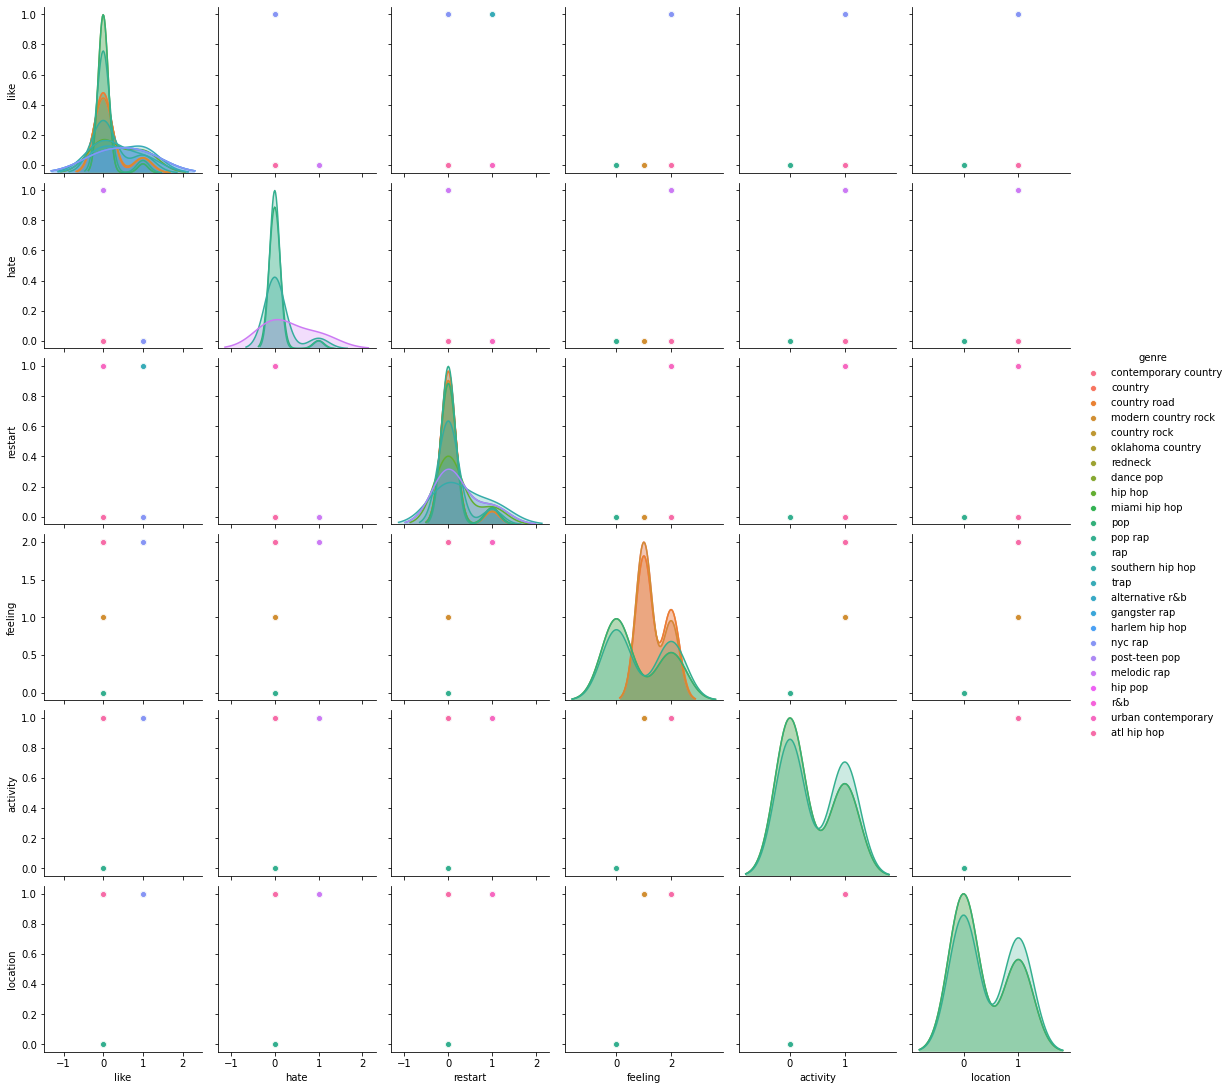

In [9]:
# plotar
import seaborn as sns

sns.pairplot(dfg, hue="genre")

In [48]:
# knn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

model = KNeighborsClassifier(n_neighbors=3)

dfgCopy = dfg.copy()

del dfgCopy['genre']

labels = le.fit_transform(dfg['genre'])

X = dfgCopy[dfgCopy.columns[:]]
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1)

model.fit(X_train, y_train)

print(X_test)

result = model.predict(X_test)

print(result)

print(dfg['genre'][result-1])

     like  hate  restart  feeling  activity  location
147     0     0        0        1         1         1
[3]
2    country road
Name: genre, dtype: object


In [49]:
model.score(X_test, y_test)

0.0